In [794]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import sklearn
from sklearn.model_selection import train_test_split

In [795]:
cars_data = pd.read_csv("CarPrice_Assignment.csv")   #Importing the data
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Data Understanding -

In [796]:
cars_data.columns   

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [797]:
cars_data.shape  # 205 data-points and 26 variables

(205, 26)

In [798]:
cars_data.info()   #No null-values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [799]:
cars_data.describe()   

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


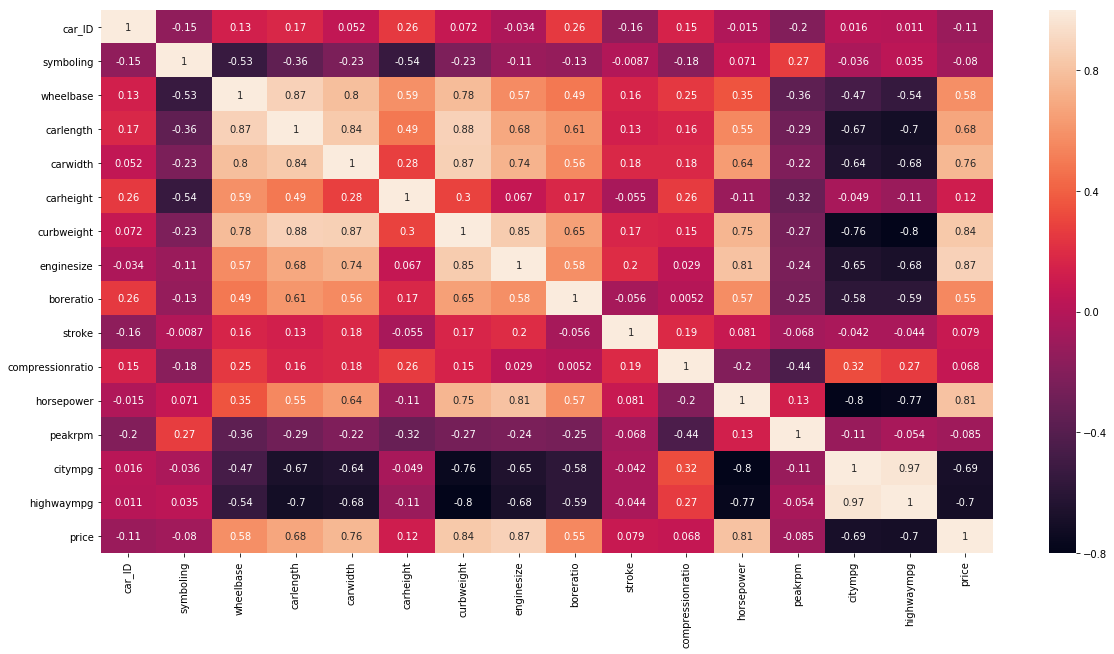

In [800]:
# Lets verify the correlation between various variables
plt.figure(figsize=(20,10))
sns.heatmap(cars_data.corr(),annot = True)    
plt.show()

**Observation**
1. 'car_ID' variable is irrelavent
2. Some variable show a high correlation between each other which will affect the final mode


In [801]:
# Dropping the variables
cars_data.drop(['car_ID','carwidth','curbweight','wheelbase','highwaympg'],axis=1,inplace=True)

## Data Preparation -

**The CarName column is in the format 'Company_name-Car_name'.**
1. Lets keep company name only for the further analysis
2. Changing 'Alpha-Romero' to 'Alpha' 

In [802]:
cars_data['CarName'] = cars_data['CarName'].str.replace('-', ' ')
cars_data['CarName'] = cars_data['CarName'].apply(lambda x : x.split(' ',1)[0])
cars_data['CarName'].unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'maxda', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce',
       'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen',
       'volkswagen', 'vw', 'volvo'], dtype=object)

In [803]:
cars_data['CarName'].value_counts()

toyota        31
nissan        17
mazda         15
mitsubishi    13
honda         13
subaru        12
volvo         11
peugeot       11
dodge          9
volkswagen     9
bmw            8
buick          8
plymouth       7
audi           7
saab           6
isuzu          4
porsche        4
alfa           3
jaguar         3
chevrolet      3
vw             2
renault        2
maxda          2
Nissan         1
toyouta        1
vokswagen      1
mercury        1
porcshce       1
Name: CarName, dtype: int64

**Here there are some company names that are spelled wrong. Hence we need to correct those**
1. Toyota
2. Mazda
3. Nissan
4. Volkswagan
5. Porsche

In [804]:
cars_data['CarName'] = cars_data['CarName'].replace({"toyouta":"toyota","maxda":"mazda","Nissan":"nissan","vw":"volkswagen","vokswagen":"volkswagen","porcshce":"porsche"})

In [805]:
cars_data['CarName'].value_counts()

toyota        32
nissan        18
mazda         17
honda         13
mitsubishi    13
volkswagen    12
subaru        12
peugeot       11
volvo         11
dodge          9
bmw            8
buick          8
audi           7
plymouth       7
saab           6
porsche        5
isuzu          4
alfa           3
jaguar         3
chevrolet      3
renault        2
mercury        1
Name: CarName, dtype: int64

In [806]:
cars_data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,3,alfa,gas,std,two,convertible,rwd,front,168.8,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.0
1,3,alfa,gas,std,two,convertible,rwd,front,168.8,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.0
2,1,alfa,gas,std,two,hatchback,rwd,front,171.2,52.4,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,176.6,54.3,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,176.6,54.3,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,17450.0


In [807]:
cars_data['fueltype'].value_counts()   #converting into binary variables

gas       185
diesel     20
Name: fueltype, dtype: int64

In [808]:
cars_data['fueltype'] = cars_data['fueltype'].apply(lambda x : 1 if x=='gas' else 0)
cars_data['fueltype'].value_counts()

1    185
0     20
Name: fueltype, dtype: int64

In [809]:
cars_data['aspiration'].value_counts()   #converting into binary variables

std      168
turbo     37
Name: aspiration, dtype: int64

In [810]:
cars_data['aspiration'] = cars_data['aspiration'].apply(lambda x : 1 if x=='std' else 0)
cars_data['aspiration'].value_counts()

1    168
0     37
Name: aspiration, dtype: int64

In [811]:
cars_data['doornumber'].value_counts()   #converting into binary variables

four    115
two      90
Name: doornumber, dtype: int64

In [812]:
cars_data['doornumber'] = cars_data['doornumber'].apply(lambda x : 2 if x=='four' else 1)
cars_data['doornumber'].value_counts()

2    115
1     90
Name: doornumber, dtype: int64

In [813]:
cars_data['enginelocation'].value_counts()   #converting into binary variables

front    202
rear       3
Name: enginelocation, dtype: int64

In [814]:
cars_data['enginelocation'] = cars_data['enginelocation'].apply(lambda x : 1 if x=='front' else 0)
cars_data['enginelocation'].value_counts()

1    202
0      3
Name: enginelocation, dtype: int64

In [815]:
cars_data['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [816]:
# Creating dummy variabels for left out categorical variables
cars_data = pd.get_dummies(cars_data)  
cars_data.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,CarName_alfa,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,1,1,1,168.8,48.8,130,3.47,2.68,9.0,111,5000,21,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,3,1,1,1,1,168.8,48.8,130,3.47,2.68,9.0,111,5000,21,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,1,171.2,52.4,152,2.68,3.47,9.0,154,5000,19,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,2,1,1,2,1,176.6,54.3,109,3.19,3.40,10.0,102,5500,24,13950.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,2,1,1,2,1,176.6,54.3,136,3.19,3.40,8.0,115,5500,18,17450.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [817]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 67 columns):
symboling                205 non-null int64
fueltype                 205 non-null int64
aspiration               205 non-null int64
doornumber               205 non-null int64
enginelocation           205 non-null int64
carlength                205 non-null float64
carheight                205 non-null float64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
horsepower               205 non-null int64
peakrpm                  205 non-null int64
citympg                  205 non-null int64
price                    205 non-null float64
CarName_alfa             205 non-null uint8
CarName_audi             205 non-null uint8
CarName_bmw              205 non-null uint8
CarName_buick            205 non-null uint8
CarName_chevrolet        205 non-null uint8
Car

**Feature Scaling needs to be done as price column has a high value as compared to other columns**

In [818]:
from sklearn.preprocessing import MinMaxScaler  #Lets use min max scaler
scaler = MinMaxScaler()

In [819]:
#Scaling the numeric varibles only
num_vars = ['symboling', 'carlength', 'carheight','enginesize', 'boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 'citympg', 'price']

cars_data[num_vars] = scaler.fit_transform(cars_data[num_vars])



/home/girish/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [820]:
cars_data.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,CarName_alfa,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.566829,0.902439,0.819512,1.560976,0.985366,0.491780,0.493740,0.248707,0.564111,0.564483,0.196409,0.233821,0.398009,0.339431,0.202540,0.014634,0.034146,0.039024,0.039024,0.014634,0.043902,0.063415,0.019512,0.014634,0.082927,0.004878,0.063415,0.087805,0.053659,0.034146,0.024390,0.009756,0.029268,0.058537,0.156098,0.058537,0.053659,0.029268,0.039024,0.341463,0.468293,0.121951,0.043902,0.585366,0.370732,0.058537,0.004878,0.058537,0.721951,0.073171,0.063415,0.019512,0.024390,0.053659,0.775610,0.117073,0.004878,0.004878,0.019512,0.053659,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,0.249061,0.297446,0.385535,0.497483,0.120377,0.184139,0.203627,0.157142,0.193460,0.149332,0.248253,0.164767,0.194688,0.181726,0.198323,0.120377,0.182050,0.194127,0.194127,0.120377,0.205380,0.244304,0.138655,0.120377,0.276447,0.069843,0.244304,0.283704,0.225894,0.182050,0.154635,0.098531,0.168970,0.235330,0.363836,0.235330,0.225894,0.168970,0.194127,0.475361,0.500215,0.328031,0.205380,0.493865,0.484183,0.235330,0.069843,0.235330,0.449134,0.261054,0.244304,0.138655,0.154635,0.225894,0.418201,0.322294,0.069843,0.069843,0.138655,0.225894,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,1.000000,1.000000,1.000000,1.000000,0.376119,0.350000,0.135849,0.435714,0.495238,0.100000,0.091667,0.265306,0.166667,0.066283,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

## Model Building -

In [821]:
#Spliting the data into train(70%) and test(30%)
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(cars_data,train_size=0.7,test_size = 0.3,random_state=100)

In [822]:
y_train = df_train.pop('price')  #Result variable
X_train = df_train               #Predictor variables

**We will be using mixed approach to find the best predictor variables**
***Recurrsive Feature Elimination and Manual feature reduction***

In [823]:
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression

In [824]:
lm = LinearRegression()          
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)     #Taking 15 variables 
rfe = rfe.fit(X_train, y_train)

In [825]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 49),
 ('fueltype', False, 48),
 ('aspiration', False, 5),
 ('doornumber', False, 24),
 ('enginelocation', False, 45),
 ('carlength', True, 1),
 ('carheight', False, 16),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 50),
 ('horsepower', False, 32),
 ('peakrpm', False, 4),
 ('citympg', False, 38),
 ('CarName_alfa', False, 15),
 ('CarName_audi', True, 1),
 ('CarName_bmw', True, 1),
 ('CarName_buick', True, 1),
 ('CarName_chevrolet', False, 22),
 ('CarName_dodge', False, 17),
 ('CarName_honda', False, 27),
 ('CarName_isuzu', False, 29),
 ('CarName_jaguar', False, 18),
 ('CarName_mazda', False, 39),
 ('CarName_mercury', False, 47),
 ('CarName_mitsubishi', False, 6),
 ('CarName_nissan', False, 31),
 ('CarName_peugeot', False, 2),
 ('CarName_plymouth', False, 14),
 ('CarName_porsche', True, 1),
 ('CarName_renault', False, 30),
 ('CarName_saab', False, 10),
 ('CarName_subaru', False, 40),
 ('CarName_toyota', False, 

**The variables with value '1' are the top 15 variable that we will be considering**

In [826]:
rfe_drop = X_train.columns[~rfe.support_]
rfe_drop

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'carheight', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'CarName_alfa', 'CarName_chevrolet', 'CarName_dodge', 'CarName_honda',
       'CarName_isuzu', 'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_renault', 'CarName_saab', 'CarName_subaru',
       'CarName_toyota', 'CarName_volkswagen', 'CarName_volvo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_five',
       'cylindernumber_six', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_s

In [827]:
X_train = X_train.drop(rfe_drop,axis=1)  #Removing the unwanted variables
X_train.columns

Index(['carlength', 'enginesize', 'boreratio', 'stroke', 'CarName_audi',
       'CarName_bmw', 'CarName_buick', 'CarName_porsche', 'enginetype_dohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

**Lets use statsmodels to build the model so as to use summary function to get into depth of the model**

In [828]:
import statsmodels.api as sm        
X_train_rfe_lm = sm.add_constant(X_train)

/home/girish/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [829]:
#First model
lm_1 = sm.OLS(y_train,X_train_rfe_lm).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     96.18
Date:                Sat, 25 Jan 2020   Prob (F-statistic):           8.94e-61
Time:                        20:30:36   Log-Likelihood:                 206.99
No. Observations:                 143   AIC:                            -384.0
Df Residuals:                     128   BIC:                            -339.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1174      0.037     -3.201      0.002      -0.190      -0.045
carlength                 0.2456      0.049      4.973      0.000       0.148       0.343
enginesize                1.4506      0.180      8.052      0.000       1.094       1.807
boreratio                -0.3169      0.076     -4.147      0.000      -0.468      -0.166
stroke                   -0.2386      0.062     -3.859      0.000      -0.361      -0.116
CarName_audi              0.1856      0.039      4.725      0.000       0.108       0.263
CarName_bmw               0.2083      0.028      7.422      0.000       0.153       0.264
CarName_buick             0.2462      0.042      5.900      0.000       0.164       0.329
CarName_porsche           0.2971      0.048      6.158      0.000       0.202       0.393
enginetype_dohcv          0.2064      0.111      1.868      0.064      -0.012       0.425
enginetype_rotor          0.2309      0.038      6.023      0.000       0.155       0.307
cylindernumber_eight     -0.2027      0.077     -2.633      0.009      -0.355      -0.050
cylindernumber_four       0.1544      0.044      3.515      0.001       0.067       0.241
cylindernumber_three      0.3110      0.082      3.775      0.000       0.148       0.474
cylindernumber_twelve    -0.4473      0.122     -3.671      0.000      -0.688      -0.206
cylindernumber_two        0.2309      0.038      6.023      0.000       0.155       0.307
==============================================================================
Omnibus:                       21.115   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.168
Skew:                           0.794   Prob(JB):                     2.81e-07
Kurtosis:                       4.595   Cond. No.                     8.42e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.05e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Observations**
1. Good r-squared value
2. Adj. r-squared value is close to r-squared value
**Lets check the VIF values as well**

In [830]:
df_VIF= cars_data.drop(rfe_drop,axis=1)

In [831]:
#Function to find the VIF values of the variables
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [832]:
vif_cal(input_data=df_VIF, dependent_col="price")

/home/girish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


,Var,Vif
9,enginetype_rotor,inf
14,cylindernumber_two,inf
1,enginesize,60.50
2,boreratio,40.80
3,stroke,26.64
0,carlength,23.97
11,cylindernumber_four,23.29
10,cylindernumber_eight,4.75
6,CarName_buick,2.61
8,enginetype_dohcv,2.30


**'enginetype_rotor' and 'cylindernumber_two' has a large VIF values which means they is multicollinear with other variables**

In [833]:
#Removing 'enginetype_rotor' variable
X_train2 = X_train.drop(['enginetype_rotor'],axis=1)
X_train_rfe_lm2 = sm.add_constant(X_train2)

/home/girish/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [834]:
#Second Model
lm_1 = sm.OLS(y_train,X_train_rfe_lm2).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     96.18
Date:                Sat, 25 Jan 2020   Prob (F-statistic):           8.94e-61
Time:                        20:30:36   Log-Likelihood:                 206.99
No. Observations:                 143   AIC:                            -384.0
Df Residuals:                     128   BIC:                            -339.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1174      0.037     -3.201      0.002      -0.190      -0.045
carlength                 0.2456      0.049      4.973      0.000       0.148       0.343
enginesize                1.4506      0.180      8.052      0.000       1.094       1.807
boreratio                -0.3169      0.076     -4.147      0.000      -0.468      -0.166
stroke                   -0.2386      0.062     -3.859      0.000      -0.361      -0.116
CarName_audi              0.1856      0.039      4.725      0.000       0.108       0.263
CarName_bmw               0.2083      0.028      7.422      0.000       0.153       0.264
CarName_buick             0.2462      0.042      5.900      0.000       0.164       0.329
CarName_porsche           0.2971      0.048      6.158      0.000       0.202       0.393
enginetype_dohcv          0.2064      0.111      1.868      0.064      -0.012       0.425
cylindernumber_eight     -0.2027      0.077     -2.633      0.009      -0.355      -0.050
cylindernumber_four       0.1544      0.044      3.515      0.001       0.067       0.241
cylindernumber_three      0.3110      0.082      3.775      0.000       0.148       0.474
cylindernumber_twelve    -0.4473      0.122     -3.671      0.000      -0.688      -0.206
cylindernumber_two        0.4618      0.077      6.023      0.000       0.310       0.613
==============================================================================
Omnibus:                       21.115   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.168
Skew:                           0.794   Prob(JB):                     2.81e-07
Kurtosis:                       4.595   Cond. No.                         82.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observations**
1. R-squared and Adj. R-squared are not affected alot.
2. Lets check the VIF table again

In [835]:
#Again checking the VIF values for 2nd model
df_VIF = df_VIF.drop('enginetype_rotor', axis =1)
vif_cal(input_data=df_VIF, dependent_col="price")

,Var,Vif
1,enginesize,60.50
2,boreratio,40.80
3,stroke,26.64
0,carlength,23.97
10,cylindernumber_four,23.29
9,cylindernumber_eight,4.75
13,cylindernumber_two,2.65
6,CarName_buick,2.61
8,enginetype_dohcv,2.30
12,cylindernumber_twelve,2.25


In [836]:
df_VIF.columns

Index(['carlength', 'enginesize', 'boreratio', 'stroke', 'price',
       'CarName_audi', 'CarName_bmw', 'CarName_buick', 'CarName_porsche',
       'enginetype_dohcv', 'cylindernumber_eight', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

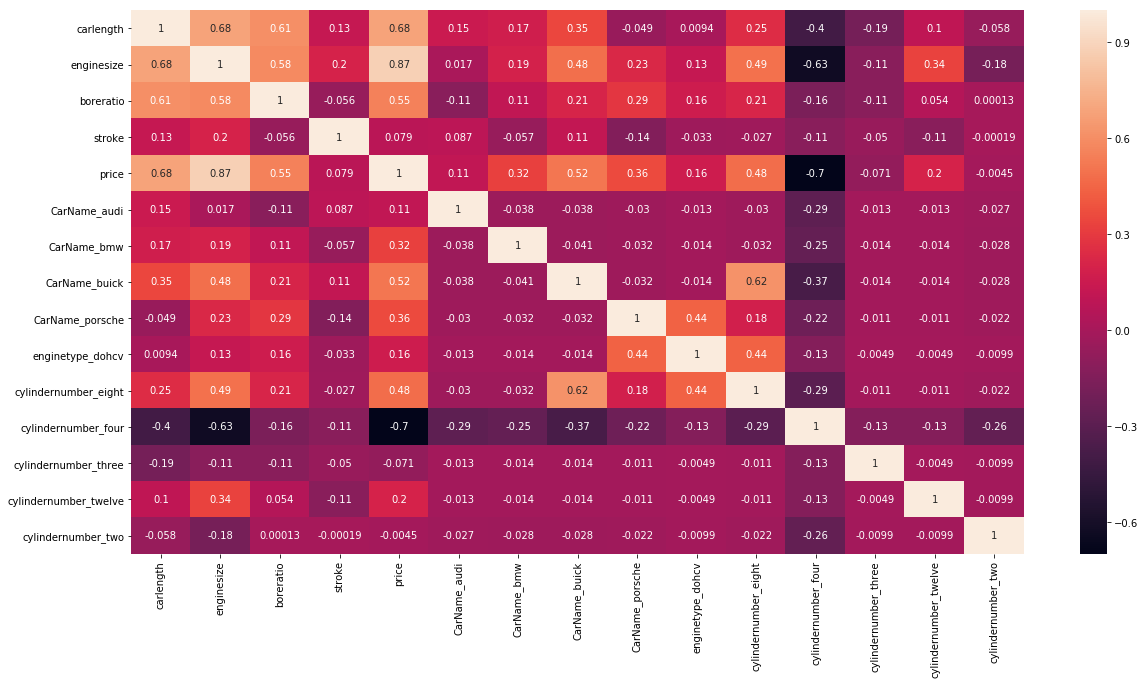

In [837]:
#Checking the Correlations between all the remaining variables
plt.figure(figsize=(20,10))
sns.heatmap(df_VIF.corr(),annot=True)
plt.show()

**There are high correlation valaues between some variables, hence removing them**

In [838]:
df_VIF =df_VIF.drop(['enginesize','boreratio','stroke'],axis=1)
#Lets check the VIF tables again
vif_cal(input_data=df_VIF, dependent_col="price")

,Var,Vif
0,carlength,4.62
7,cylindernumber_four,3.52
6,cylindernumber_eight,2.50
3,CarName_buick,2.39
5,enginetype_dohcv,1.75
4,CarName_porsche,1.29
1,CarName_audi,1.19
2,CarName_bmw,1.19
10,cylindernumber_two,1.06
9,cylindernumber_twelve,1.05


In [839]:
X_train2.columns

Index(['carlength', 'enginesize', 'boreratio', 'stroke', 'CarName_audi',
       'CarName_bmw', 'CarName_buick', 'CarName_porsche', 'enginetype_dohcv',
       'cylindernumber_eight', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [840]:
X_train3 = X_train2.drop(['enginesize','boreratio','stroke'],axis=1)

#Third model
X_train_rfe_lm3 = sm.add_constant(X_train3)
lm_2 = sm.OLS(y_train,X_train_rfe_lm3).fit()
lm_2.summary()


/home/girish/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     68.64
Date:                Sat, 25 Jan 2020   Prob (F-statistic):           7.05e-49
Time:                        20:30:38   Log-Likelihood:                 168.92
No. Observations:                 143   AIC:                            -313.8
Df Residuals:                     131   BIC:                            -278.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0643      0.034      1.894      0.060      -0.003       0.131
carlength                 0.4598      0.043     10.739      0.000       0.375       0.545
CarName_audi             -0.0248      0.040     -0.621      0.536      -0.104       0.054
CarName_bmw               0.1997      0.036      5.574      0.000       0.129       0.271
CarName_buick             0.1468      0.049      2.969      0.004       0.049       0.245
CarName_porsche           0.3894      0.056      6.934      0.000       0.278       0.500
enginetype_dohcv         -0.2144      0.119     -1.801      0.074      -0.450       0.021
cylindernumber_eight      0.1757      0.071      2.480      0.014       0.036       0.316
cylindernumber_four      -0.1516      0.023     -6.646      0.000      -0.197      -0.106
cylindernumber_three     -0.0634      0.085     -0.749      0.455      -0.231       0.104
cylindernumber_twelve     0.3551      0.080      4.427      0.000       0.196       0.514
cylindernumber_two       -0.0596      0.045     -1.335      0.184      -0.148       0.029
==============================================================================
Omnibus:                       32.780   Durbin-Watson:                   2.219
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.650
Skew:                           1.072   Prob(JB):                     3.03e-13
Kurtosis:                       5.254   Cond. No.                         27.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observations**
1. R-squared and Adj.R-squared values have reduced but are still high values
2. As these values are high, model explains the variance of the data properly.
3. VIF tables has values less than '5' so multicollinear variables are handeled.

## Residual Check - 

In [841]:
#Making predicitions on training data
y_train_predict = lm_2.predict(X_train_rfe_lm3)

Text(0.5, 0.98, 'Error Terms')

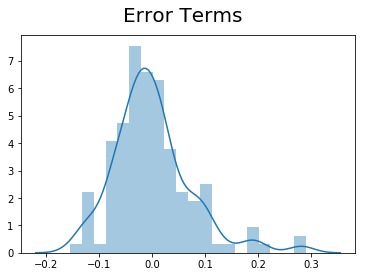

In [842]:
#Plotting error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 


**Error terms follow a normal distribution**

## Predictions -

In [843]:
df_test.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,CarName_alfa,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
160,0.4,1,1,2,1,0.376119,0.433333,0.139623,0.464286,0.457143,0.12500,0.091667,0.265306,0.694444,0.065041,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
186,0.8,1,1,2,1,0.456716,0.658333,0.181132,0.464286,0.633333,0.12500,0.154167,0.448980,0.388889,0.083834,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
59,0.6,1,1,1,1,0.547761,0.491667,0.230189,0.607143,0.628571,0.10000,0.150000,0.265306,0.361111,0.092523,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
165,0.6,1,1,1,1,0.411940,0.400000,0.139623,0.500000,0.480952,0.15000,0.266667,1.000000,0.361111,0.103768,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
140,0.8,1,1,1,1,0.241791,0.658333,0.177358,0.771429,0.271429,0.10625,0.104167,0.102041,0.361111,0.061690,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [844]:
#Separating result and predictor variables
y_test = df_test.pop('price')
X_test = df_test

In [845]:
X_test.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,CarName_alfa,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
160,0.4,1,1,2,1,0.376119,0.433333,0.139623,0.464286,0.457143,0.12500,0.091667,0.265306,0.694444,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
186,0.8,1,1,2,1,0.456716,0.658333,0.181132,0.464286,0.633333,0.12500,0.154167,0.448980,0.388889,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
59,0.6,1,1,1,1,0.547761,0.491667,0.230189,0.607143,0.628571,0.10000,0.150000,0.265306,0.361111,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
165,0.6,1,1,1,1,0.411940,0.400000,0.139623,0.500000,0.480952,0.15000,0.266667,1.000000,0.361111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
140,0.8,1,1,1,1,0.241791,0.658333,0.177358,0.771429,0.271429,0.10625,0.104167,0.102041,0.361111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [846]:
#Adding constant term for statsmodels.api
X_test_new = X_test[X_train3.columns]
X_test_new = sm.add_constant(X_test_new)

In [847]:
X_test_new.head()

,const,carlength,CarName_audi,CarName_bmw,CarName_buick,CarName_porsche,enginetype_dohcv,cylindernumber_eight,cylindernumber_four,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
160,1.0,0.376119,0,0,0,0,0,0,1,0,0,0
186,1.0,0.456716,0,0,0,0,0,0,1,0,0,0
59,1.0,0.547761,0,0,0,0,0,0,1,0,0,0
165,1.0,0.411940,0,0,0,0,0,0,1,0,0,0
140,1.0,0.241791,0,0,0,0,0,0,1,0,0,0


In [848]:
#Predicting...
y_test_pred = lm_2.predict(X_test_new)
y_test_pred.head()

160    0.085636
186    0.122696
59     0.164559
165    0.102107
140    0.023871
dtype: float64

In [849]:
y_test.head()

160    0.065041
186    0.083834
59     0.092523
165    0.103768
140    0.061690
Name: price, dtype: float64

Text(0, 0.5, 'y_pred')

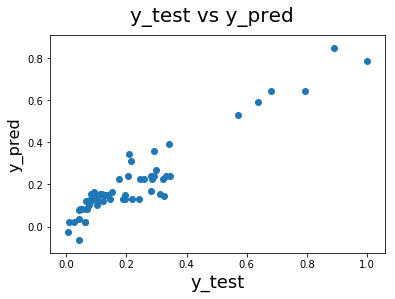

In [850]:
#Finally plotting the predicted y with y_test
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16) 

In [851]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8857770106983354

**The R-Squared value of the prediction is = 0.88. Hence 88.6% of the variance of data is explained by the model**